<a href="https://colab.research.google.com/github/ErnestoTejeda7/Simulacion_II/blob/main/Unidad%20II/Lanzamiento_3_monedas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología de la Simulación

Método de *Muestreo importancia* para resolver
$$I=\int_0^{\pi\ /\ 2} sin\ x\ dx$$

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejercicio

Método de *Muestreo importancia* para resolver
$$I=\int_0^{\pi\ /\ 2} sin\ x\ dx$$

1. Analíticamente.
2. Mediante simulación.

### Analiticamente:

El problema es una integral directa:
\begin{align*}
I=\int_0^{\pi\ /\ 2} sin\ x\ dx = -cos\ x \Bigg|_0^{\pi\ /\ 2} = -(0-1) = 1
\end{align*}

Por tanto, **$I=1$**

### Por simulación: 


**PASO 1**. Defina las variables que intervienen en el modelo.

Para poder resolver el problema vía simulación necesitamos definir 2 funciones, primero
$$g(x) = sin\ x,\ 0\leq x \leq \pi/2$$
y una función de densidad $f(x)$ con soporte $(0, \pi/2)$ tal que la integral se pueda transformar de la siguiente manera

$$I=\int_0^{\pi\ /\ 2} \frac{g(x)}{f(x)}\ f(x) \ dx $$

Luego, podemos estimar $I$ de la siguiente forma

$$I=E\left[ \frac{g(x)}{f(x)} \right] \approx \frac{1}{N}\displaystyle\sum_{i=1}^{N} \frac{g(u_i)}{f(u_i)}$$

donde $u_i \sim U(0,\pi/2)$

Por conveniencia, definimos a $f(x)$ como una recta constante $f(x)=cx,\ 0\leq x \leq \pi/2 $. Como queremos que $f$ se una función de densidad, entonces observamos el área debajo de dicha recta, la cual la podemos pensar como el área de un triángulo
$$A=\frac{base\cdot altura}{2}=\frac{(\frac{\pi}{2})(c\frac{\pi}{2})}{2}=c\frac{\pi^2}{8}$$
luego, si tomamos $c=\frac{8}{\pi^2}$, conseguimos que $f$ sea una densidad.

**PASO 2**. Formule la distribución de probabilidad de cada variable.

$$
f(x)= 
\begin{cases} 
\frac{8}{\pi^2}x & \text{si } 0 \leq x \leq \pi/2 \\
0 & \text{en cualquier otro lugar}
\end{cases}
$$

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

$$
f(x)= 
\begin{cases} 
0 & \text{si  } x \leq 0\\
\frac{4}{\pi^2}x^2 & \text{si  } 0 \leq x \leq \pi/2 \\
1 & \text{si  }  \pi/2 \leq x
\end{cases}
$$

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|    Variables |**x**|
|------|-------|
|Intervalo|(0,\pi/2) |

**PASO 5**. Genere números aleatorios.

In [1]:
import random
import math
u_i=random.uniform(0,math.pi/2)

**PASO 6**. Simule un lanzamiento.

En este caso cada lanzamiento es un cálculo de $\frac{g(u_i)}{f(u_i)}$

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def g(x):
    return math.sin(x)
def f(x):
    return (8*x)/(math.pi**2)

In [53]:
def experimento(iteraciones):
    i = 1
    suma=0
    Lista = []
    while i <= iteraciones:
        u=random.uniform(0,math.pi/2)
        suma = suma + (g(u)/f(u))
        Lista.append(suma/(i))
        i += 1
    
    #CONDICIÓN ESTABILIDAD
    estable = 0
    estabilidad = 0
    error=10E-5
    for k in range(1, iteraciones):
        dif = abs(Lista[k] - Lista[k - 1])
        if dif < error:
            estabilidad += 1
        else:
            estabilidad = 0  

        if estabilidad > 10:  
            estable = k
            break

    return Lista, estable

In [54]:
(exp,estable) = experimento(2000)

In [55]:
np.mean(exp)

1.0016564254365388

In [17]:
estable

1554

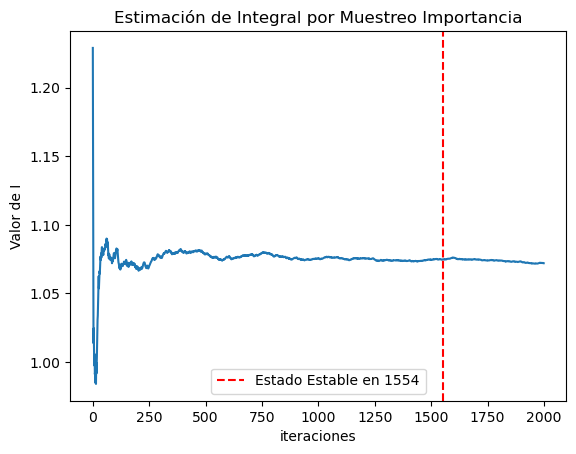

In [18]:
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('Valor de I')
plt.title('Estimación de Integral por Muestreo Importancia')

# Agrega una línea vertical e donde comienza el estado estable.
plt.axvline(x=estable, color='red', linestyle='--', label=f'Estado Estable en {estable}')

plt.legend()  # Muestra la leyenda si es necesario
plt.show()

**PASO 8**. Replique el modelo.

In [19]:
def simulacion_caras(repeticiones):
    l = []
    for i in range(repeticiones):
        l.append(np.mean(experimento(estable)[0]))
    return l

In [20]:
N=1000
simulacion = simulacion_caras(N)

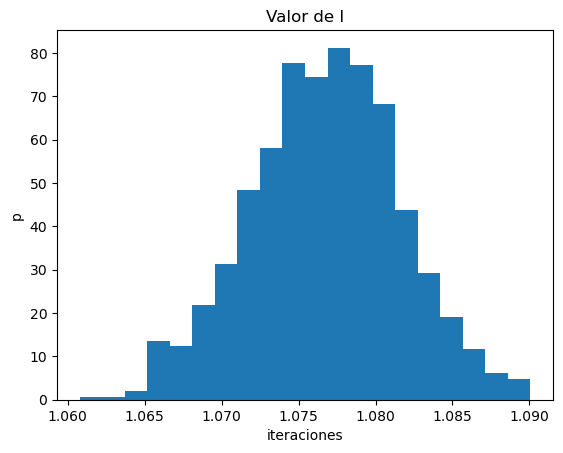

In [21]:
plt.hist(simulacion, bins=20, density=1)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Valor de I')
plt.show()

**PASO 9**. Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire y su desviación
estándar.

In [22]:
media = np.mean(simulacion); var = np.var(simulacion); desv= np.std(simulacion)
print(media, var, desv)

1.0767543665348813 2.3533702265287643e-05 0.004851154735244758


**PASO 10**. Halle el intervalo de confianza de la probabilidad de queaparezcan dos caras lanzando tres veces una moneda
al aire con un nivel de confianza del $95 \%$.

\begin{equation*}
\overline{x}- Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}} < \mu < \overline{x}+ Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}}
\end{equation*}

In [23]:
from scipy.stats import norm #Importamos la libreria para poder obtener el valor de Z.
alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para \alpha/2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
l_inferior = media - z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite inferior por la formula
l_superior = media + z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite superior por la formula
print("Entonces: ", l_inferior, "< \u03BC <", l_superior, "\nCon un 95% de confianza") #El intervalo en donde se encuentra el valor real a una confienza del 95%

Entonces:  1.0764536943742968 < μ < 1.0770550386954658 
Con un 95% de confianza
